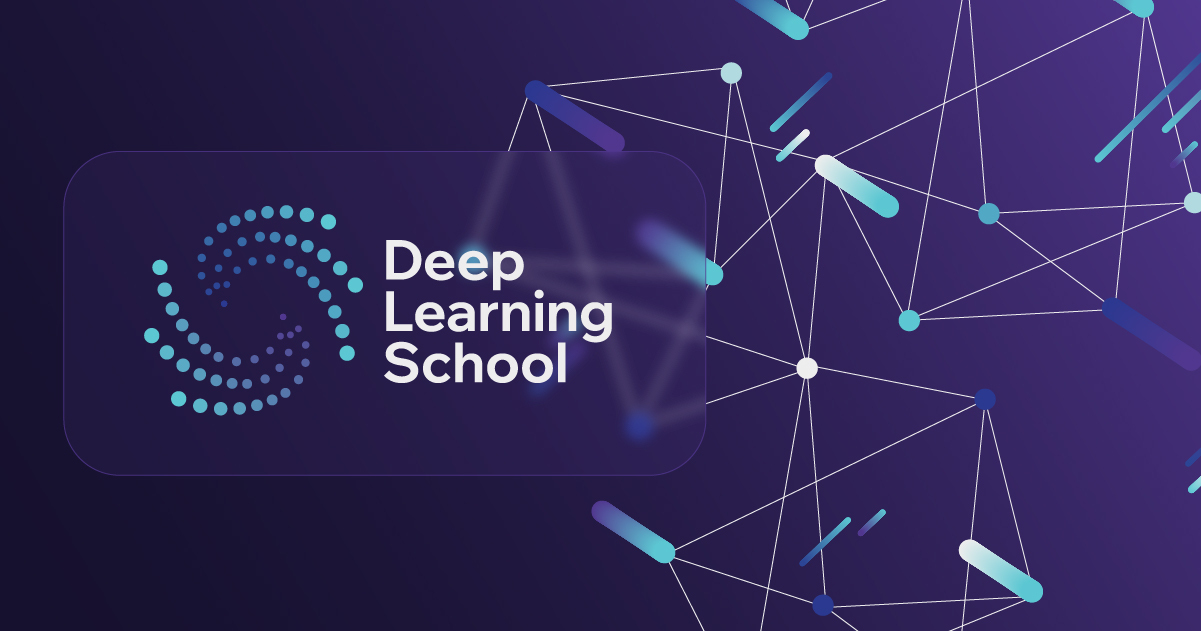

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

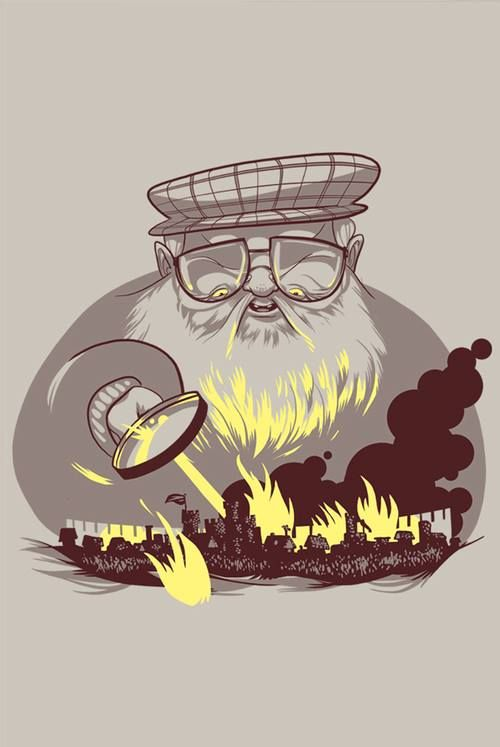

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ — 5 баллов

2) $0.75 > score \geqslant 0.65$ — 4 балла

3) $0.65 > score \geqslant 0.55$ — 3 балла

4) $0.55 > score \geqslant 0.50$ — 2 балла

5) $0.50 > score \geqslant 0.45$ — 1 балл

6) $0.45 > score$ — 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [88]:
import gdown

In [4]:
gdown.download(id='1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3') # test dataset
gdown.download(id='1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v') # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: C:\Users\Roman\Desktop\DLS\HW1\game_of_thrones_test.csv
100%|█████████████████████████████████████████████████████████████████████████████████████| 37.3k/37.3k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: C:\Users\Roman\Desktop\DLS\HW1\game_of_thrones_train.csv
100%|███████████████████████████████████████████████████████████████████████████████| 138k/138k [00:00<00:00, 2.02MB/s]


'game_of_thrones_train.csv'

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [288]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [289]:
# Заполним в текстовых столбцах NaN-ы пустой строкой
str_columns = data.select_dtypes(include=['object']).columns
data[str_columns] = data[str_columns].fillna('')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,,1,,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,,,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,,,,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,,NaN,,,,House Swyft,,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,,82.0,,,,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,,,,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,,NaN,,,,,,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,,0,,NaN,,,,,,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,,1,,NaN,,,,House Seaworth,,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [290]:
# Эксперименты в поисках большего скора показали, что хорошей практикой будут следующие преобразования числовых признаков:
data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].quantile(0.5))
data['age'] = data['age'].fillna(data['age'].quantile(0.5))
data['isAliveMother'] = data['isAliveMother'].fillna(0.0)
data['isAliveFather'] = data['isAliveFather'].fillna(0.0)
data['isAliveHeir'] = data['isAliveHeir'].fillna(0.0)
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(0.0)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [291]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
data[['name', 'isPopular']].head()

,name,isPopular
S.No,,
1,Viserys II Targaryen,1
2,Walder Frey,1
3,Addison Hill,0
4,Aemma Arryn,0
5,Sylva Santagar,0


In [292]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data[['name', 'boolDeadRelations']].head()

,name,boolDeadRelations
S.No,,
1,Viserys II Targaryen,1
2,Walder Frey,1
3,Addison Hill,0
4,Aemma Arryn,0
5,Sylva Santagar,0


In [293]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [294]:
data[['name', 'culture']].head()

,name,culture
S.No,,
1,Viserys II Targaryen,
2,Walder Frey,Rivermen
3,Addison Hill,
4,Aemma Arryn,
5,Sylva Santagar,Dornish


In [295]:
# Посмотрим количество уникальных культур
data[~data['culture'].isin([''])][['culture']].drop_duplicates().shape

(51, 1)

In [296]:
# приводим значения из датасета к одному виду
def simplify_culture(data_cult):
    for cult_name, cult_alias in cult.items():
        if data_cult.lower() in cult_alias:
            return cult_name
    return data_cult

In [297]:
data['culture'] = data['culture'].apply(simplify_culture)

In [298]:
data[['name', 'culture']].head()

,name,culture
S.No,,
1,Viserys II Targaryen,
2,Walder Frey,Rivermen
3,Addison Hill,
4,Aemma Arryn,
5,Sylva Santagar,Dornish


In [299]:
# Посмотрим количество уникальных культур после упрощения
data[~data['culture'].isin([''])][['culture']].drop_duplicates().shape

(34, 1)

_51 культура превратилась в 34_

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [302]:
# Дропал всё это на первой попытке, но больший скор получился при сохранении данных признаков
# data = data.drop(columns=['title', 'mother', 'father', 'heir', 'spouse'])
# data.columns

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

_Целевая переменная, конечно, категориальная: с двумя значениями — жив или нет_

In [303]:
# Посчитаем сбалансированность
data["isAlive"].value_counts(normalize=True)

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64

_Видим дизбаланс в пользу живых_  
хдхд

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [304]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,,1,,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,,,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,,,,House Frey,Perra Royce,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,,272.0,,,,House Swyft,,...,0.0,0.0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,,82.0,,,,House Arryn,Viserys I Targaryen,...,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,,,,House Santagar,Eldon Estermont,...,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


In [305]:
data.dtypes

name                  object
title                 object
male                   int64
culture               object
dateOfBirth          float64
mother                object
father                object
heir                  object
house                 object
spouse                object
book1                  int64
book2                  int64
book3                  int64
book4                  int64
book5                  int64
isAliveMother        float64
isAliveFather        float64
isAliveHeir          float64
isAliveSpouse        float64
isMarried              int64
isNoble                int64
age                  float64
numDeadRelations       int64
popularity           float64
isAlive                int64
isPopular              int64
boolDeadRelations      int64
dtype: object

In [306]:
# Будем использовать LabelEncoder из sklearn
from sklearn.preprocessing import LabelEncoder

unprocessed_categorial_features = ['culture', 'house', 'title', 'mother', 'father', 'heir', 'spouse']

for column in unprocessed_categorial_features:
    data[column] = LabelEncoder().fit_transform(data[column])

In [307]:
numerical_columns = data.select_dtypes(include=['float64', 'int32', 'int64']).columns
num_features = data[numerical_columns]
num_features.head()

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,272.0,12,9,1,0,0,0,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,1
2,116,1,23,208.0,0,0,0,107,135,1,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,164,1,0,272.0,0,0,0,245,0,0,...,0.0,0.0,0,1,24.0,0,0.267559,1,0,0
4,146,0,0,82.0,0,0,0,22,177,0,...,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,54,0,5,276.0,0,0,0,220,57,0,...,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


<Axes: >

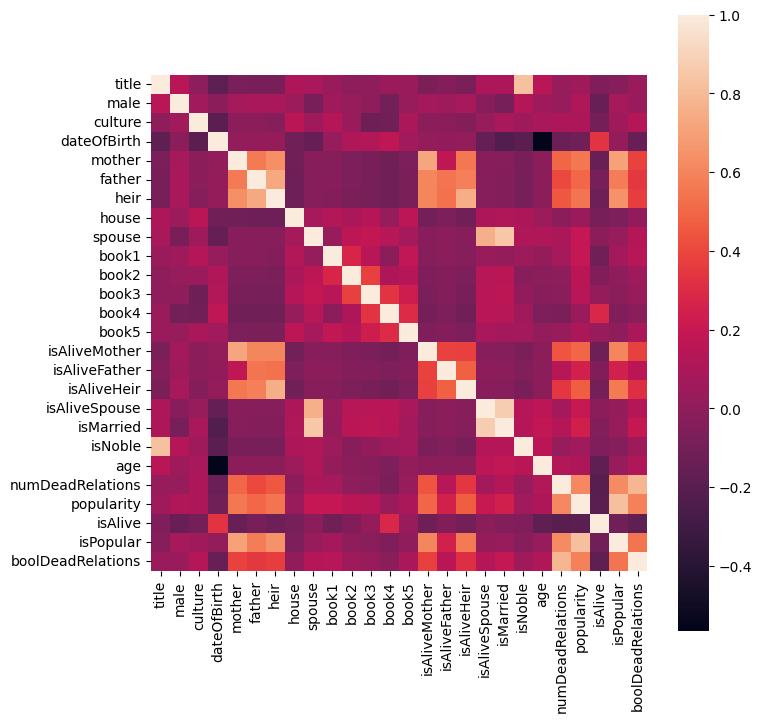

In [308]:
corr_mat = num_features.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_mat, square=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [309]:
feature_columns = data.drop(columns=['isAlive']).columns
features_df = data[numerical_columns]
features_df.head()

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,272.0,12,9,1,0,0,0,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,1
2,116,1,23,208.0,0,0,0,107,135,1,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,164,1,0,272.0,0,0,0,245,0,0,...,0.0,0.0,0,1,24.0,0,0.267559,1,0,0
4,146,0,0,82.0,0,0,0,22,177,0,...,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,54,0,5,276.0,0,0,0,220,57,0,...,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


In [310]:
corr_mat = num_features.corrwith(data['isAlive'])
corr_mat

title               -0.060831
male                -0.148290
culture             -0.096126
dateOfBirth          0.332522
mother              -0.148649
father              -0.092781
heir                -0.121164
house               -0.091746
spouse              -0.021080
book1               -0.112468
book2               -0.055998
book3                0.018427
book4                0.284014
book5                0.032531
isAliveMother       -0.129817
isAliveFather       -0.051718
isAliveHeir         -0.096622
isAliveSpouse       -0.020436
isMarried           -0.049381
isNoble             -0.060572
age                 -0.179331
numDeadRelations    -0.198876
popularity          -0.194187
isAlive              1.000000
isPopular           -0.118673
boolDeadRelations   -0.178177
dtype: float64

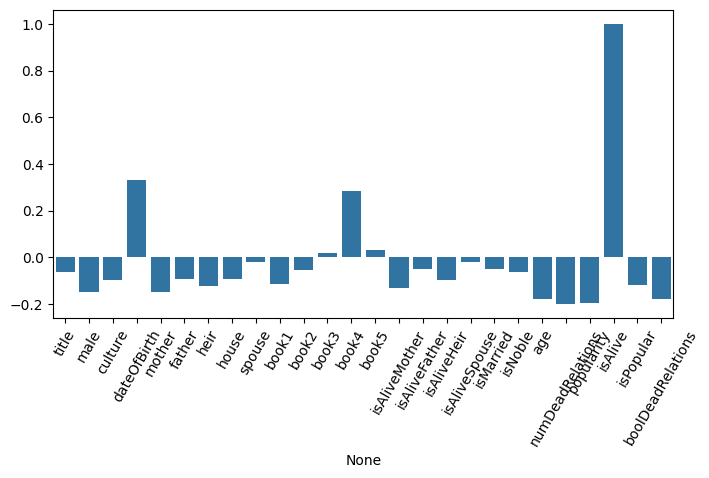

In [312]:
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_mat.index, y=corr_mat.values)
plt.xticks(rotation=60)
plt.show()

_Видим наиболее сильное влияние (внезапно) даты рождения, появления в 4 книге, живы ли мать, отец, наследник и популярности_

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [313]:
X = data.drop(columns=['name', 'isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [316]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [317]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [331]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=1000000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [332]:
# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred_ada_boost = ada_boost.predict(X_test)

In [333]:
# RandomForest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [334]:
# GaussianProcess
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gaussian_process = gaussian_process.predict(X_test)

In [335]:
# GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

In [336]:
# KNeighbors
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train, y_train)
y_pred_k_neighbors = k_neighbors.predict(X_test)

In [337]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [338]:
# DecisionTree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [339]:
# Также добавим CatBoost, в чате разрешили ;)

from catboost import CatBoostClassifier

# CatBoost
cat_boost = CatBoostClassifier(silent=True)
cat_boost.fit(X_train, y_train)
y_pred_cat_boost = cat_boost.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [340]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [341]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [342]:
acc_dict = {}
for model in [logistic_regression, ada_boost, random_forest, gaussian_process, 
              gaussian_nb, k_neighbors, svc, decision_tree, cat_boost]:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_dict[str(model)] = accuracy

acc_dict

{'LogisticRegression(C=1, max_iter=1000000)': 0.8333333333333334,
 'AdaBoostClassifier()': 0.8269230769230769,
 'RandomForestClassifier()': 0.8397435897435898,
 'GaussianProcessClassifier()': 0.7628205128205128,
 'GaussianNB()': 0.8012820512820513,
 'KNeighborsClassifier()': 0.8012820512820513,
 'SVC()': 0.8012820512820513,
 'DecisionTreeClassifier()': 0.8141025641025641,
 '<catboost.core.CatBoostClassifier object at 0x000001BCF5701280>': 0.8461538461538461}

Выберите лучшую модель.

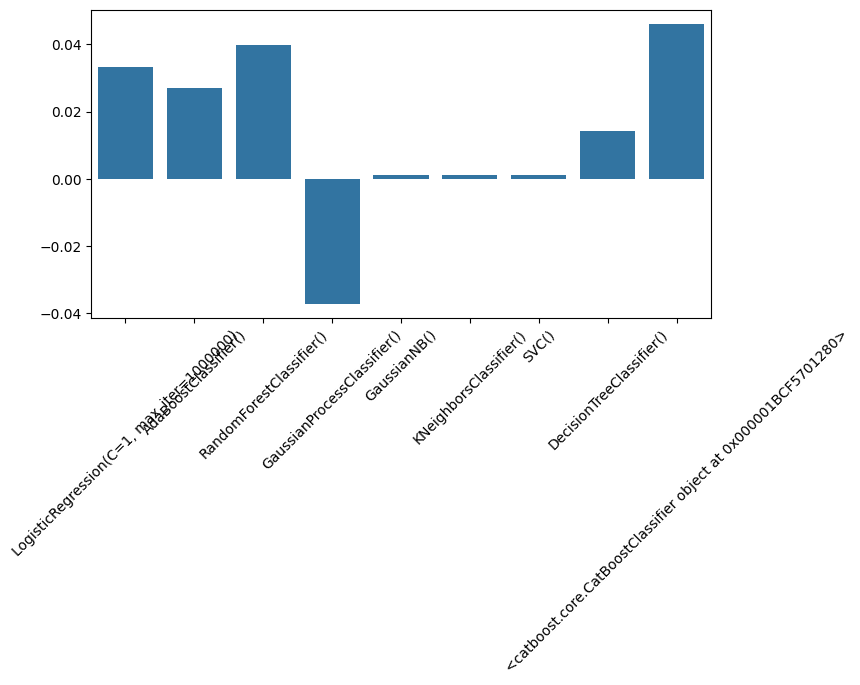

In [343]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(acc_dict.keys()), y=list(i - 0.8 for i in acc_dict.values()))
plt.xticks(rotation=45)
plt.show()

_Лучше всех показал себя CatBoost_

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [89]:
gdown.download(id='1M14conWjAW2QLoyCXbHEAy8bql2f99eF')

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: C:\Users\Roman\Desktop\DLS\HW1\submission.csv
100%|█████████████████████████████████████████████████████████████████████████████████████| 2.74k/2.74k [00:00<?, ?B/s]


'submission.csv'

In [351]:
submission = pd.read_csv('submission.csv', index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [352]:
test_data = pd.read_csv('game_of_thrones_test.csv', index_col="S.No")
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [353]:
# Фичи в тестовой выборке
test_data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [354]:
# Нужные нам фичи
data.drop(columns=['name', 'isAlive']).columns

Index(['title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

_Проведём с тестовой выборкой те же процедуры_

In [355]:
# Обработаем данные
str_columns = test_data.select_dtypes(include=['object']).columns
test_data[str_columns] = test_data[str_columns].fillna('')
test_data['dateOfBirth'] = test_data.dateOfBirth.fillna(data_try.dateOfBirth.quantile(0.5))
test_data['age'] = test_data['age'].fillna(test_data['age'].quantile(0.5))
test_data['isAliveMother'] = test_data['isAliveMother'].fillna(0.0)
test_data['isAliveFather'] = test_data['isAliveFather'].fillna(0.0)
test_data['isAliveHeir'] = test_data['isAliveHeir'].fillna(0.0)
test_data['isAliveSpouse'] = test_data['isAliveSpouse'].fillna(0.0)

# Создадим новые признаки
test_data['isPopular'] = test_data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
test_data['boolDeadRelations'] = test_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Упростим культуру
test_data['culture'] = test_data['culture'].apply(simplify_culture)

# Преобразуем категориальные признаки
unprocessed_categorial_features = ['culture', 'house', 'title', 'mother', 'father', 'heir', 'spouse']

for column in unprocessed_categorial_features:
    test_data[column] = LabelEncoder().fit_transform(test_data[column])

numerical_columns = test_data.select_dtypes(include=['float64', 'int32', 'int64']).columns
num_features = test_data[numerical_columns]

X_test_submission = test_data.drop(columns=['name']).values

In [356]:
y_pred = cat_boost.predict(X_test_submission)
len(y_pred)

389

In [357]:
submission['isAlive'] = y_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [358]:
submission.to_csv("new_submission.csv", index=False)